In [1]:
import xarray as xr

In [2]:
sat_sst=xr.open_dataset("/csiem/sst_selected_2022.nc")
sat_sst

<xarray.Dataset>
Dimensions:       (time: 365, latitude: 1175, longitude: 778)
Coordinates:
  * time          (time) datetime64[ns] 2022-01-01T09:00:00 ... 2022-12-31T09...
  * latitude      (latitude) float32 -34.32 -34.31 -34.3 ... -22.6 -22.59 -22.58
  * longitude     (longitude) float32 108.5 108.5 108.5 ... 116.3 116.3 116.3
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...

In [3]:
sst_march=sat_sst.sel(time=slice("2022-03-01", "2022-03-31"))
sst_march

<xarray.Dataset>
Dimensions:       (time: 31, latitude: 1175, longitude: 778)
Coordinates:
  * time          (time) datetime64[ns] 2022-03-01T09:00:00 ... 2022-03-31T09...
  * latitude      (latitude) float32 -34.32 -34.31 -34.3 ... -22.6 -22.59 -22.58
  * longitude     (longitude) float32 108.5 108.5 108.5 ... 116.3 116.3 116.3
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...

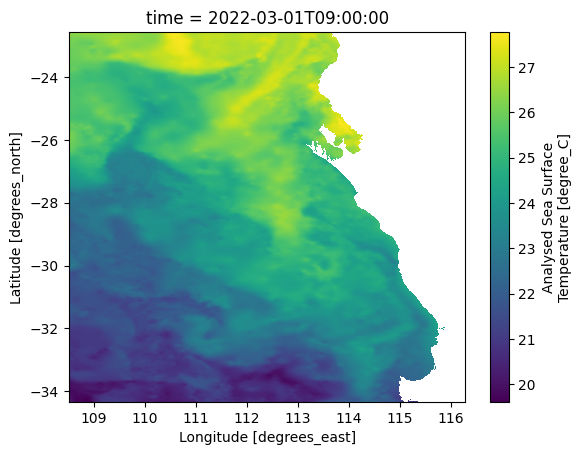

In [4]:
sst_march.analysed_sst[0].plot()

In [89]:
import rioxarray
import xarray as xr
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("./Shapefile/csiem_material_011_1_MultiPolygon.shp")

# Ensure the shapefile has a valid CRS
gdf = gdf.to_crs("EPSG:4326")  # Convert to WGS84 if necessary

In [6]:
ghrsst_1km = sst_march.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
ghrsst_1km.rio.write_crs("EPSG:4326", inplace=True)
ghrsst_1km_cropped = ghrsst_1km.rio.clip(gdf.geometry, gdf.crs)
ghrsst_1km_cropped

<xarray.Dataset>
Dimensions:       (time: 31, latitude: 101, longitude: 53)
Coordinates:
  * time          (time) datetime64[ns] 2022-03-01T09:00:00 ... 2022-03-31T09...
  * latitude      (latitude) float32 -32.67 -32.66 -32.65 ... -31.68 -31.67
  * longitude     (longitude) float32 115.3 115.3 115.3 ... 115.8 115.8 115.8
    spatial_ref   int64 0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 nan nan nan ... nan nan

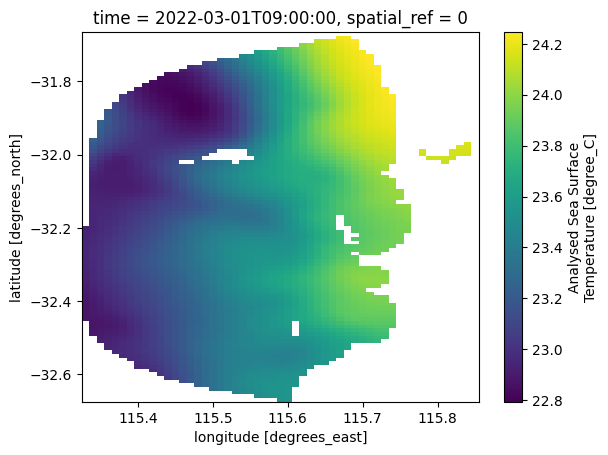

In [7]:
ghrsst_1km_cropped.analysed_sst[0].plot()

In [8]:
ghrsst_1km_cropped.to_netcdf("/csiem/csiem_val/ghrsst_sst_march_daily.nc")

In [10]:
ROMS_data=xr.open_dataset("/csiem/ROMS/Surface_temp/surface temp_Salt_2022.nc")
ROMS_data

<xarray.Dataset>
Dimensions:     (ocean_time: 365, lat: 640, lon: 480)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2022-01-01T12:00:00 ... 2022-12-3...
    s_rho       float64 ...
  * lat         (lat) float64 -34.33 -34.31 -34.29 ... -22.61 -22.59 -22.57
  * lon         (lon) float64 108.5 108.5 108.5 108.6 ... 116.3 116.3 116.3
Data variables:
    temp        (ocean_time, lat, lon) float64 ...
    salt        (ocean_time, lat, lon) float64 ...

In [12]:
rom_march=ROMS_data.temp.sel(ocean_time=slice("2022-03-01", "2022-03-31"))
rom_march

<xarray.DataArray 'temp' (ocean_time: 31, lat: 640, lon: 480)>
[9523200 values with dtype=float64]
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2022-03-01T12:00:00 ... 2022-03-3...
    s_rho       float64 ...
  * lat         (lat) float64 -34.33 -34.31 -34.29 ... -22.61 -22.59 -22.57
  * lon         (lon) float64 108.5 108.5 108.5 108.6 ... 116.3 116.3 116.3

In [14]:
data_array = rom_march.rename({"ocean_time": "time"})

print(data_array)

<xarray.DataArray 'temp' (time: 31, lat: 640, lon: 480)>
[9523200 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2022-03-01T12:00:00 ... 2022-03-31T12:00:00
    s_rho    float64 ...
  * lat      (lat) float64 -34.33 -34.31 -34.29 -34.27 ... -22.61 -22.59 -22.57
  * lon      (lon) float64 108.5 108.5 108.5 108.6 ... 116.2 116.3 116.3 116.3


In [15]:
roms_2km = data_array.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
roms_2km.rio.write_crs("EPSG:4326", inplace=True)
roms_2km_cropped = roms_2km.rio.clip(gdf.geometry, gdf.crs)
roms_2km_cropped

<xarray.DataArray 'temp' (time: 31, lat: 55, lon: 33)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time         (time) datetime64[ns] 2022-03-01T12:00:00 ... 2022-03-31T12:...
    s_rho        float64 ...
  * lat          (lat) float64 -32.67 -32.65 -32.63 ... -31.71 -31.7 -31.68
  * lon          (lon) float64 115.3 115.3 115.4 115.4 ... 115.8 115.8 115.8
    spatial_ref  int64 0

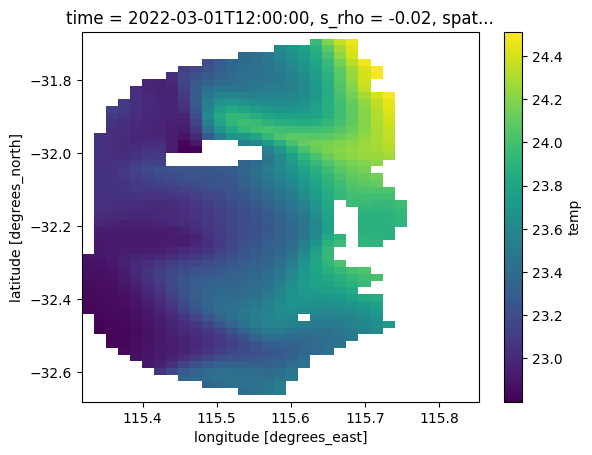

In [16]:
roms_2km_cropped[0].plot()

In [17]:
roms_2km_cropped.to_netcdf("/csiem/csiem_val/ROMS_temp_march_daily.nc")

In [85]:

import glob
file_paths = glob.glob("/csiem/sentinel/S3_Chl_202203*.nc")

# Open the files into a single xarray Dataset
ds = xr.open_mfdataset(file_paths)
ds

<xarray.Dataset>
Dimensions:    (time: 31, latitude: 360, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 -33.0 -32.99 -32.99 ... -31.01 -31.01 -31.0
  * longitude  (longitude) float32 114.0 114.0 114.0 114.0 ... 116.0 116.0 116.0
  * time       (time) datetime64[ns] 2022-03-01 2022-03-02 ... 2022-03-31
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 360), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-28T21:04:20Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-olci...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.2.0

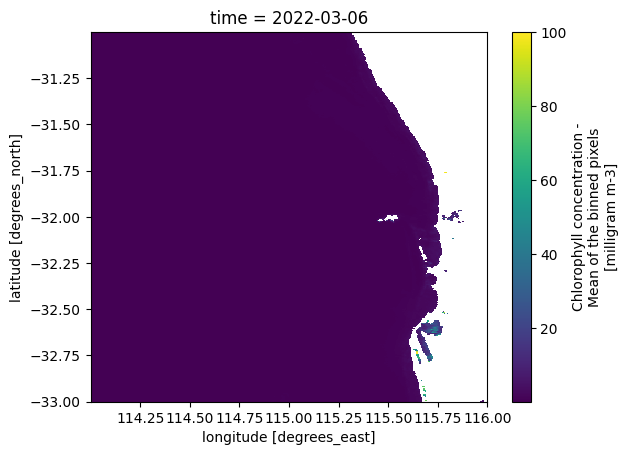

In [88]:
ds.CHL[5].plot()

In [91]:
s3_chl = ds.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
s3_chl.rio.write_crs("EPSG:4326", inplace=True)
s3_chl_cropped = s3_chl.rio.clip(gdf.geometry, gdf.crs)

In [92]:
s3_chl_cropped

<xarray.Dataset>
Dimensions:          (latitude: 181, longitude: 96, time: 31)
Coordinates:
  * latitude         (latitude) float32 -32.67 -32.67 -32.66 ... -31.68 -31.68
  * longitude        (longitude) float32 115.3 115.3 115.3 ... 115.8 115.8 115.9
  * time             (time) datetime64[ns] 2022-03-01 2022-03-02 ... 2022-03-31
    spatial_ref      int64 0
    Equirectangular  int64 0
Data variables:
    CHL              (time, latitude, longitude) float32 dask.array<chunksize=(1, 181, 96), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-28T21:04:20Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-olci...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.2.0

In [93]:
s3_chl_cropped.to_netcdf("/csiem/csiem_val/sentinel_march_Daily.nc")

#### Look at the average SST

In [31]:
csiem=xr.open_dataset("/csiem/csiem_val/csiem_temp_march.nc")
sat=xr.open_dataset("/csiem/csiem_val/ghrsst_sst_march_daily.nc")
roms=xr.open_dataset("/csiem/csiem_val/ROMS_temp_march_daily.nc")

In [32]:
print(csiem)
print(sat)
print(roms)

<xarray.Dataset>
Dimensions:    (latitude: 101, longitude: 53, time: 31)
Coordinates:
  * latitude   (latitude) float64 -32.68 -32.67 -32.66 ... -31.7 -31.69 -31.68
  * longitude  (longitude) float64 115.3 115.3 115.3 115.4 ... 115.8 115.8 115.8
  * time       (time) datetime64[ns] 2022-03-01 2022-03-02 ... 2022-03-31
Data variables:
    TEMP       (time, latitude, longitude) float64 ...
<xarray.Dataset>
Dimensions:       (time: 31, latitude: 101, longitude: 53)
Coordinates:
  * time          (time) datetime64[ns] 2022-03-01T09:00:00 ... 2022-03-31T09...
  * latitude      (latitude) float32 -32.67 -32.66 -32.65 ... -31.68 -31.67
  * longitude     (longitude) float32 115.3 115.3 115.3 ... 115.8 115.8 115.8
Data variables:
    spatial_ref   int64 ...
    analysed_sst  (time, latitude, longitude) float64 ...
<xarray.Dataset>
Dimensions:      (time: 31, lat: 55, lon: 33)
Coordinates:
  * time         (time) datetime64[ns] 2022-03-01T12:00:00 ... 2022-03-31T12:...
    s_rho        float64 .

In [33]:
# Compute mean SST over time
csiem_avg = csiem.mean(dim="time")
sat_avg = sat.mean(dim="time")
roms_avg = roms.mean(dim="time")

In [34]:
# Interpolate ROMS & Satellite to match CSIEM grid
roms_avg_interp = roms_avg.interp(lat=csiem.latitude, lon=csiem.longitude)
sat_avg_interp = sat_avg.interp(latitude=csiem.latitude, longitude=csiem.longitude)

In [35]:
# Compute differences
diff_csiem_roms = csiem_avg['TEMP'] - roms_avg_interp['temp']
diff_csiem_sat = csiem_avg['TEMP'] - sat_avg_interp['analysed_sst']

In [49]:
# Define discrete colorbar levels
levels = np.linspace(np.nanmin(csiem_avg['TEMP']), np.nanmax(csiem_avg['TEMP']), 40)
diff_levels = np.linspace(-np.max(np.abs(diff_csiem_roms)), np.max(np.abs(diff_csiem_roms)), 20)

In [79]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#cmap_main = plt.get_cmap("hot")
cmap_main = plt.get_cmap("inferno")
#cmap_diff = plt.get_cmap("RdBu_r")
cmap_diff = plt.cm.get_cmap('RdBu_r').copy()
cmap_diff.set_bad(color='gray')

/tmp/ipykernel_52067/3164594778.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_diff = plt.cm.get_cmap('RdBu_r').copy()


In [80]:
norm_main = mcolors.BoundaryNorm(levels, cmap_main.N)
norm_diff = mcolors.BoundaryNorm(diff_levels, cmap_diff.N)

In [55]:
norm_main

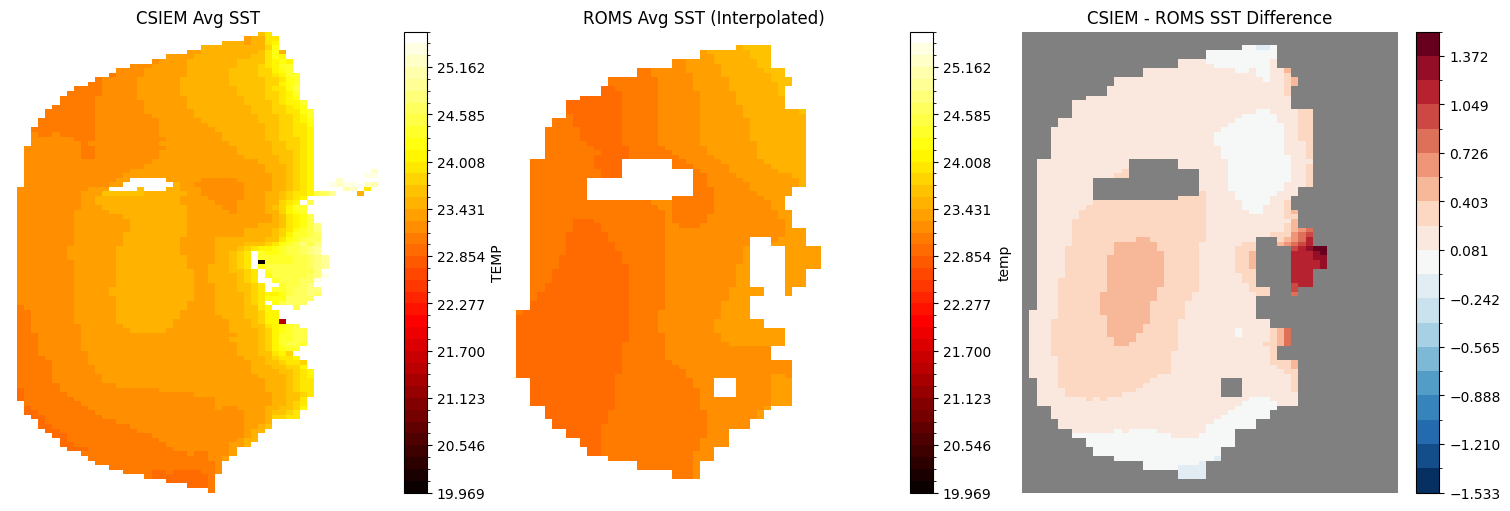

In [77]:
# Plot CSIEM vs. ROMS
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
csiem_avg['TEMP'].plot(ax=axes[0], cmap=cmap_main, norm=norm_main)
axes[0].set_title("CSIEM Avg SST")
axes[0].axis("off")

roms_avg_interp['temp'].plot(ax=axes[1], cmap=cmap_main, norm=norm_main)
axes[1].set_title("ROMS Avg SST (Interpolated)")
axes[1].axis("off")

diff_csiem_roms.plot(ax=axes[2], cmap=cmap_diff, norm=norm_diff)
axes[2].set_title("CSIEM - ROMS SST Difference")
axes[2].axis("off")   

plt.show()

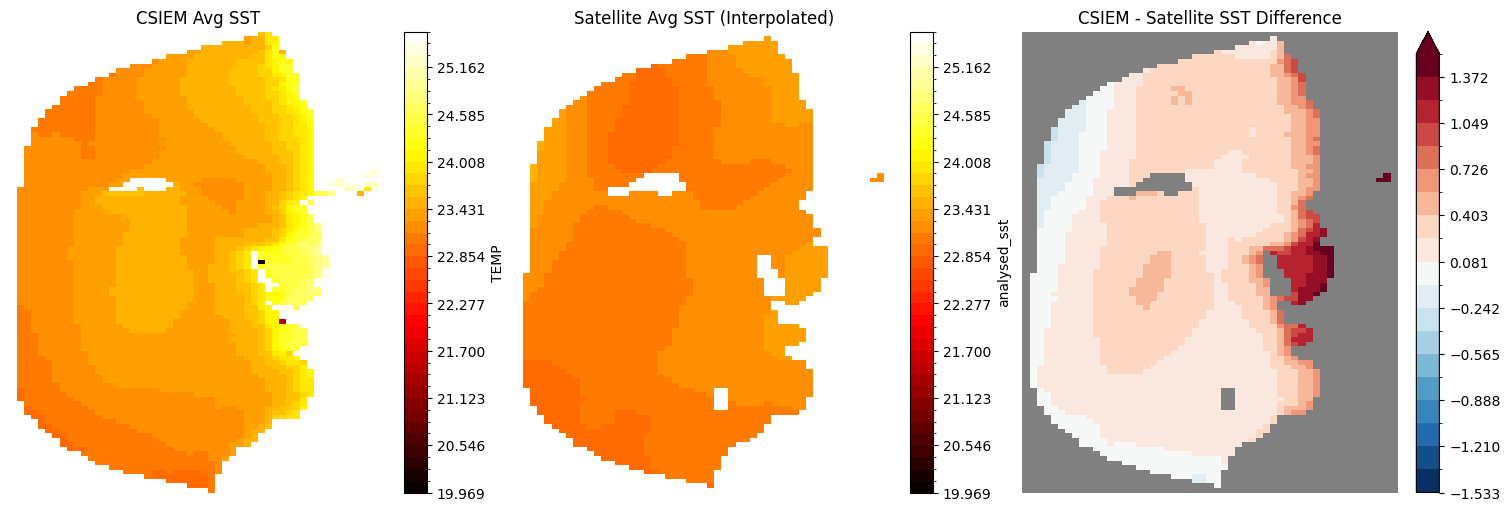

In [78]:
# Plot CSIEM vs. Satellite
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
csiem_avg['TEMP'].plot(ax=axes[0], cmap=cmap_main, norm=norm_main)
axes[0].set_title("CSIEM Avg SST")
axes[0].axis("off")
sat_avg_interp['analysed_sst'].plot(ax=axes[1], cmap=cmap_main, norm=norm_main)
axes[1].set_title("Satellite Avg SST (Interpolated)")
axes[1].axis("off")
diff_csiem_sat.plot(ax=axes[2], cmap=cmap_diff, norm=norm_diff)
axes[2].set_title("CSIEM - Satellite SST Difference")
axes[2].axis("off")  
plt.show()

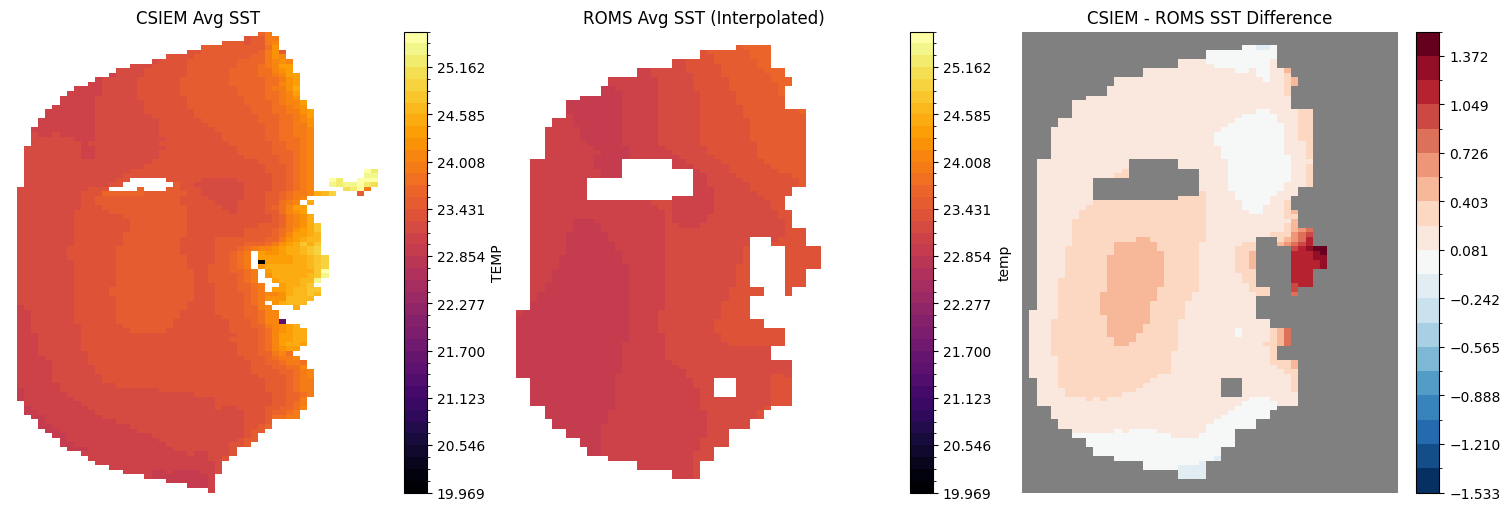

In [81]:
# Plot CSIEM vs. ROMS
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
csiem_avg['TEMP'].plot(ax=axes[0], cmap=cmap_main, norm=norm_main)
axes[0].set_title("CSIEM Avg SST")
axes[0].axis("off")

roms_avg_interp['temp'].plot(ax=axes[1], cmap=cmap_main, norm=norm_main)
axes[1].set_title("ROMS Avg SST (Interpolated)")
axes[1].axis("off")

diff_csiem_roms.plot(ax=axes[2], cmap=cmap_diff, norm=norm_diff)
axes[2].set_title("CSIEM - ROMS SST Difference")
axes[2].axis("off")   

plt.show()

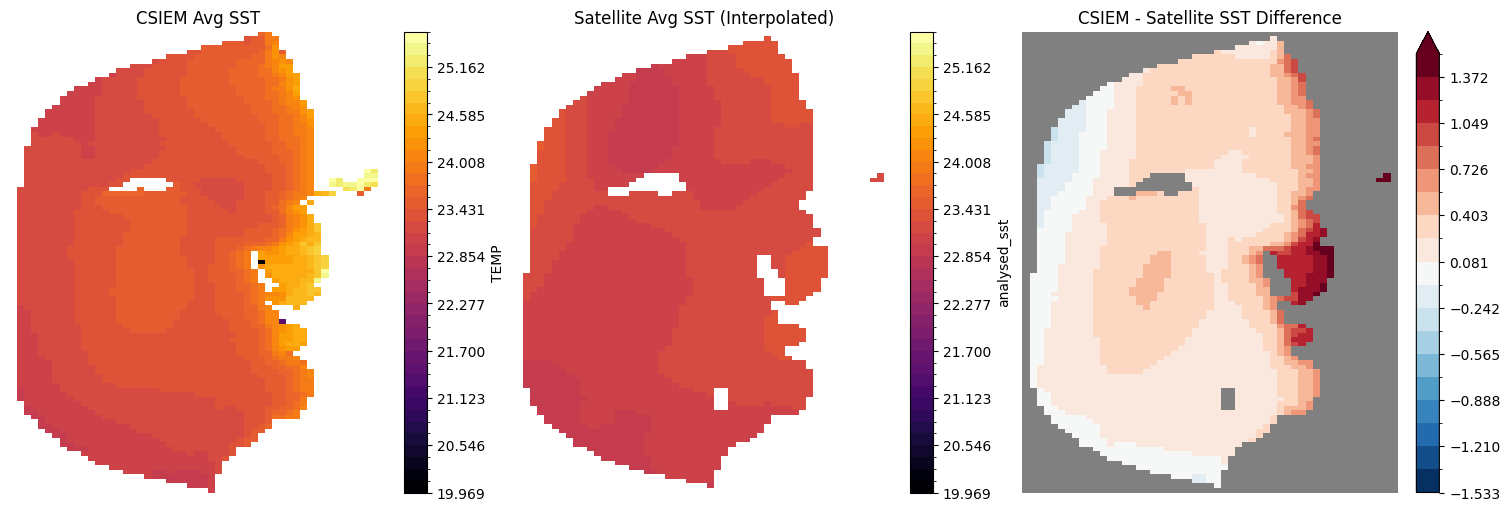

In [82]:
# Plot CSIEM vs. Satellite
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
csiem_avg['TEMP'].plot(ax=axes[0], cmap=cmap_main, norm=norm_main)
axes[0].set_title("CSIEM Avg SST")
axes[0].axis("off")
sat_avg_interp['analysed_sst'].plot(ax=axes[1], cmap=cmap_main, norm=norm_main)
axes[1].set_title("Satellite Avg SST (Interpolated)")
axes[1].axis("off")
diff_csiem_sat.plot(ax=axes[2], cmap=cmap_diff, norm=norm_diff)
axes[2].set_title("CSIEM - Satellite SST Difference")
axes[2].axis("off")  
plt.show()

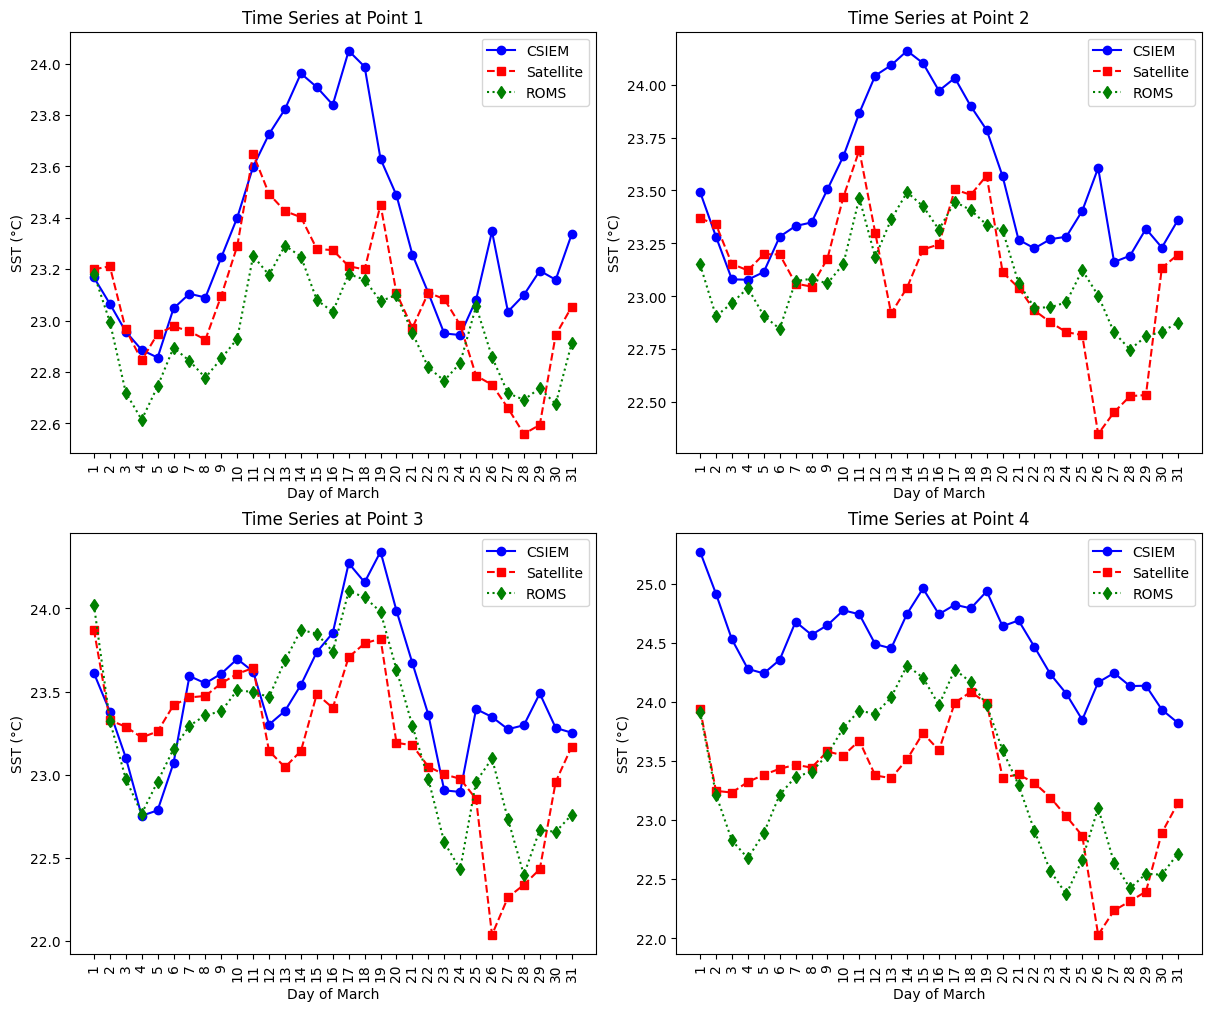

In [65]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Define four points (longitude, latitude)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]

# Extract time series for each dataset
time_series = {}
for i, (lon, lat) in enumerate(points):
    csiem_interp = csiem['TEMP'].interp(longitude=lon, latitude=lat)
    sat_interp = sat['analysed_sst'].interp(longitude=lon, latitude=lat)
    roms_interp = roms['temp'].interp(lon=lon, lat=lat)

    time_series[f"Point {i+1}"] = {
        "CSIEM": csiem_interp,
        "Satellite": sat_interp,
        "ROMS": roms_interp
    }

# Plot time series for four points
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

for i, (point, data) in enumerate(time_series.items()):
    ax = axes[i // 2, i % 2]
    
    # Convert time to day of the month
    days = pd.to_datetime(data["CSIEM"].time.values).day  

    ax.plot(days, data["CSIEM"], label="CSIEM", linestyle="-", color="blue", marker="o")
    ax.plot(days, data["Satellite"], label="Satellite", linestyle="--", color="red", marker="s")
    ax.plot(days, data["ROMS"], label="ROMS", linestyle=":", color="green", marker="d")

    ax.set_title(f"Time Series at {point}")
    ax.set_xlabel("Day of March")
    ax.set_ylabel("SST (°C)")
    ax.set_xticks(range(1, 32))  # Set x-axis to show days from 1 to 31
    ax.set_xticklabels(range(1, 32), rotation=90)  # Rotate labels 90 degrees
    ax.legend()
plt.show()

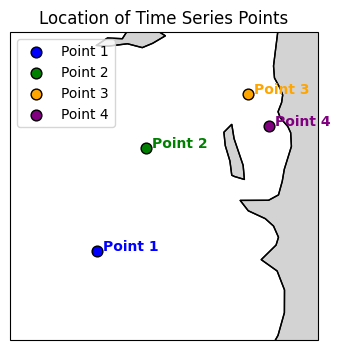

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define four points (longitude, latitude)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]

# Assign different colors for each point
colors = ["blue", "green", "orange", "purple"]
labels = ["Point 1", "Point 2", "Point 3", "Point 4"]

# Create figure for the mini map
fig_map = plt.figure(figsize=(4, 4))
ax_map = fig_map.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add map features
ax_map.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax_map.add_feature(cfeature.COASTLINE)
ax_map.set_extent([115.3, 115.8, -32.5, -32.0])  # Zoom into the region

# Plot locations of the four points
for (lon, lat), color, label in zip(points, colors, labels):
    ax_map.scatter(lon, lat, color=color, s=60, marker="o", edgecolors="black", label=label)
    ax_map.text(lon + 0.01, lat, label, fontsize=10, color=color, weight="bold")  # Label each point

ax_map.set_title("Location of Time Series Points")
ax_map.legend()

plt.show()

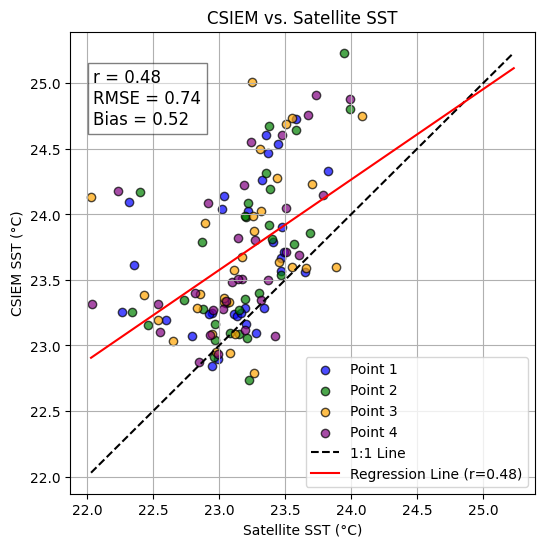

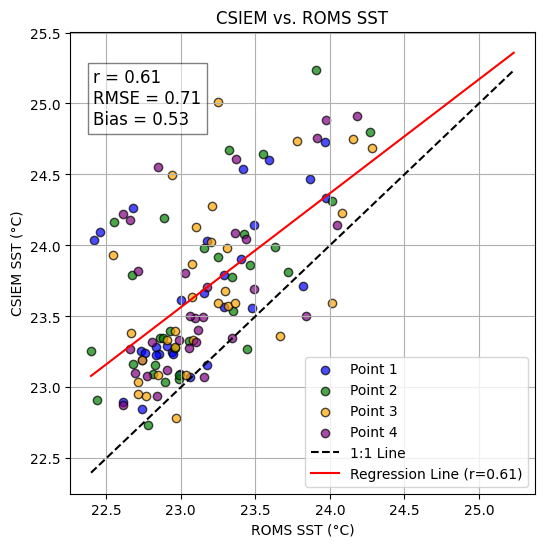

In [70]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

# Define four observation points (lon, lat)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]

# Extract time series data at each point
csiem_vals, sat_vals, roms_vals = [], [], []
for lon, lat in points:
    csiem_vals.append(csiem['TEMP'].sel(longitude=lon, latitude=lat, method='nearest').values)
    sat_vals.append(sat['analysed_sst'].sel(longitude=lon, latitude=lat, method='nearest').values)
    roms_vals.append(roms['temp'].sel(lon=lon, lat=lat, method='nearest').values)

# Flatten the arrays for scatter plots
csiem_vals = np.concatenate(csiem_vals)
sat_vals = np.concatenate(sat_vals)
roms_vals = np.concatenate(roms_vals)

# Define function to compute statistics
def compute_stats(x, y):
    slope, intercept, r_value, _, _ = linregress(x, y)
    rmse = np.sqrt(mean_squared_error(x, y))
    mean_bias = np.mean(y - x)
    return slope, intercept, r_value, rmse, mean_bias

# Compute statistics for CSIEM vs. Satellite
slope_sat, intercept_sat, r_sat, rmse_sat, bias_sat = compute_stats(sat_vals, csiem_vals)

# Compute statistics for CSIEM vs. ROMS
slope_roms, intercept_roms, r_roms, rmse_roms, bias_roms = compute_stats(roms_vals, csiem_vals)

# Define colors for points
colors = ["blue", "green", "orange", "purple"]
labels = ["Point 1", "Point 2", "Point 3", "Point 4"]

# Scatter plot function
def scatter_plot(x, y, slope, intercept, r, rmse, bias, xlabel, ylabel, title):
    plt.figure(figsize=(6, 6))
    
    # Plot data points for each observation point
    for i in range(4):
        plt.scatter(x[i::4], y[i::4], label=labels[i], color=colors[i], edgecolors="black", alpha=0.7)
    
    # 1:1 reference line
    min_val, max_val = min(x.min(), y.min()), max(x.max(), y.max())
    plt.plot([min_val, max_val], [min_val, max_val], "k--", label="1:1 Line")

    # Regression line
    reg_x = np.linspace(min_val, max_val, 100)
    reg_y = slope * reg_x + intercept
    plt.plot(reg_x, reg_y, "r-", label=f"Regression Line (r={r:.2f})")

    # Display stats
    stats_text = f"r = {r:.2f}\nRMSE = {rmse:.2f}\nBias = {bias:.2f}"
    plt.text(0.05, 0.85, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

    # Labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter plot CSIEM vs. Satellite
scatter_plot(sat_vals, csiem_vals, slope_sat, intercept_sat, r_sat, rmse_sat, bias_sat, 
             xlabel="Satellite SST (°C)", ylabel="CSIEM SST (°C)", 
             title="CSIEM vs. Satellite SST")

# Scatter plot CSIEM vs. ROMS
scatter_plot(roms_vals, csiem_vals, slope_roms, intercept_roms, r_roms, rmse_roms, bias_roms, 
             xlabel="ROMS SST (°C)", ylabel="CSIEM SST (°C)", 
             title="CSIEM vs. ROMS SST")

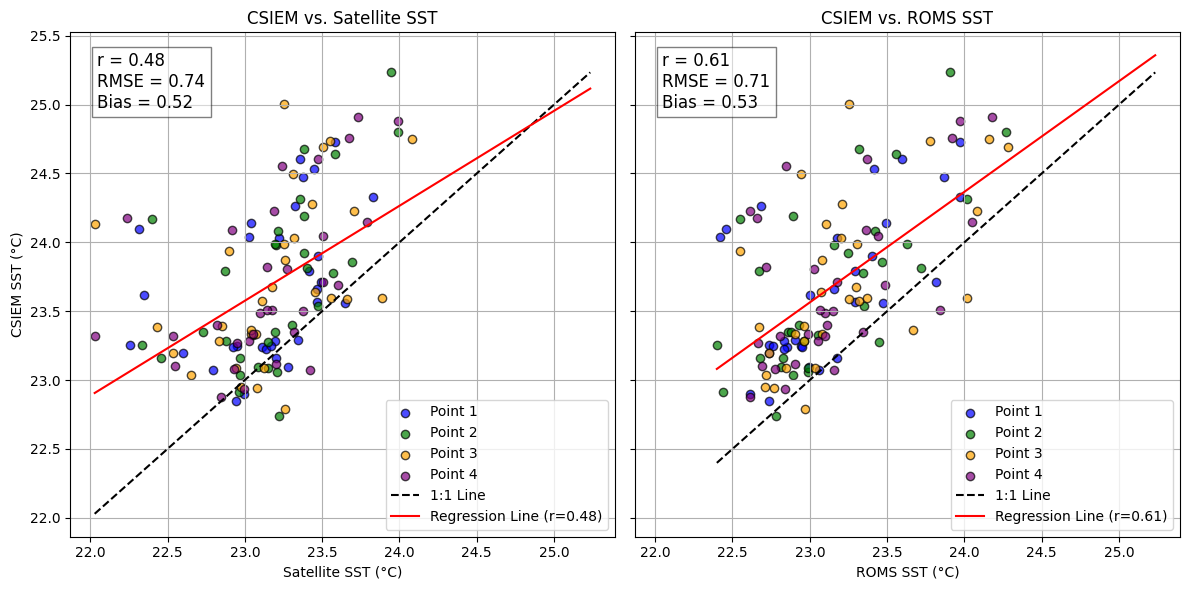

In [71]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

# Define four observation points (lon, lat)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]


# Extract time series data at each point
csiem_vals, sat_vals, roms_vals = [], [], []
for lon, lat in points:
    csiem_vals.append(csiem['TEMP'].sel(longitude=lon, latitude=lat, method='nearest').values)
    sat_vals.append(sat['analysed_sst'].sel(longitude=lon, latitude=lat, method='nearest').values)
    roms_vals.append(roms['temp'].sel(lon=lon, lat=lat, method='nearest').values)

# Flatten the arrays for scatter plots
csiem_vals = np.concatenate(csiem_vals)
sat_vals = np.concatenate(sat_vals)
roms_vals = np.concatenate(roms_vals)

# Define function to compute statistics
def compute_stats(x, y):
    slope, intercept, r_value, _, _ = linregress(x, y)
    rmse = np.sqrt(mean_squared_error(x, y))
    mean_bias = np.mean(y - x)
    return slope, intercept, r_value, rmse, mean_bias

# Compute statistics
slope_sat, intercept_sat, r_sat, rmse_sat, bias_sat = compute_stats(sat_vals, csiem_vals)
slope_roms, intercept_roms, r_roms, rmse_roms, bias_roms = compute_stats(roms_vals, csiem_vals)

# Define colors for points
colors = ["blue", "green", "orange", "purple"]
labels = ["Point 1", "Point 2", "Point 3", "Point 4"]

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

for i, (x_vals, title, slope, intercept, r, rmse, bias, xlabel) in enumerate([
    (sat_vals, "CSIEM vs. Satellite SST", slope_sat, intercept_sat, r_sat, rmse_sat, bias_sat, "Satellite SST (°C)"),
    (roms_vals, "CSIEM vs. ROMS SST", slope_roms, intercept_roms, r_roms, rmse_roms, bias_roms, "ROMS SST (°C)")
]):
    ax = axes[i]
    
    # Plot data points for each observation point
    for j in range(4):
        ax.scatter(x_vals[j::4], csiem_vals[j::4], label=labels[j], color=colors[j], edgecolors="black", alpha=0.7)
    
    # 1:1 reference line
    min_val, max_val = min(x_vals.min(), csiem_vals.min()), max(x_vals.max(), csiem_vals.max())
    ax.plot([min_val, max_val], [min_val, max_val], "k--", label="1:1 Line")

    # Regression line
    reg_x = np.linspace(min_val, max_val, 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, "r-", label=f"Regression Line (r={r:.2f})")

    # Display stats
    stats_text = f"r = {r:.2f}\nRMSE = {rmse:.2f}\nBias = {bias:.2f}"
    ax.text(0.05, 0.85, stats_text, transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

    # Labels and title
    ax.set_xlabel(xlabel)
    if i == 0:
        ax.set_ylabel("CSIEM SST (°C)")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

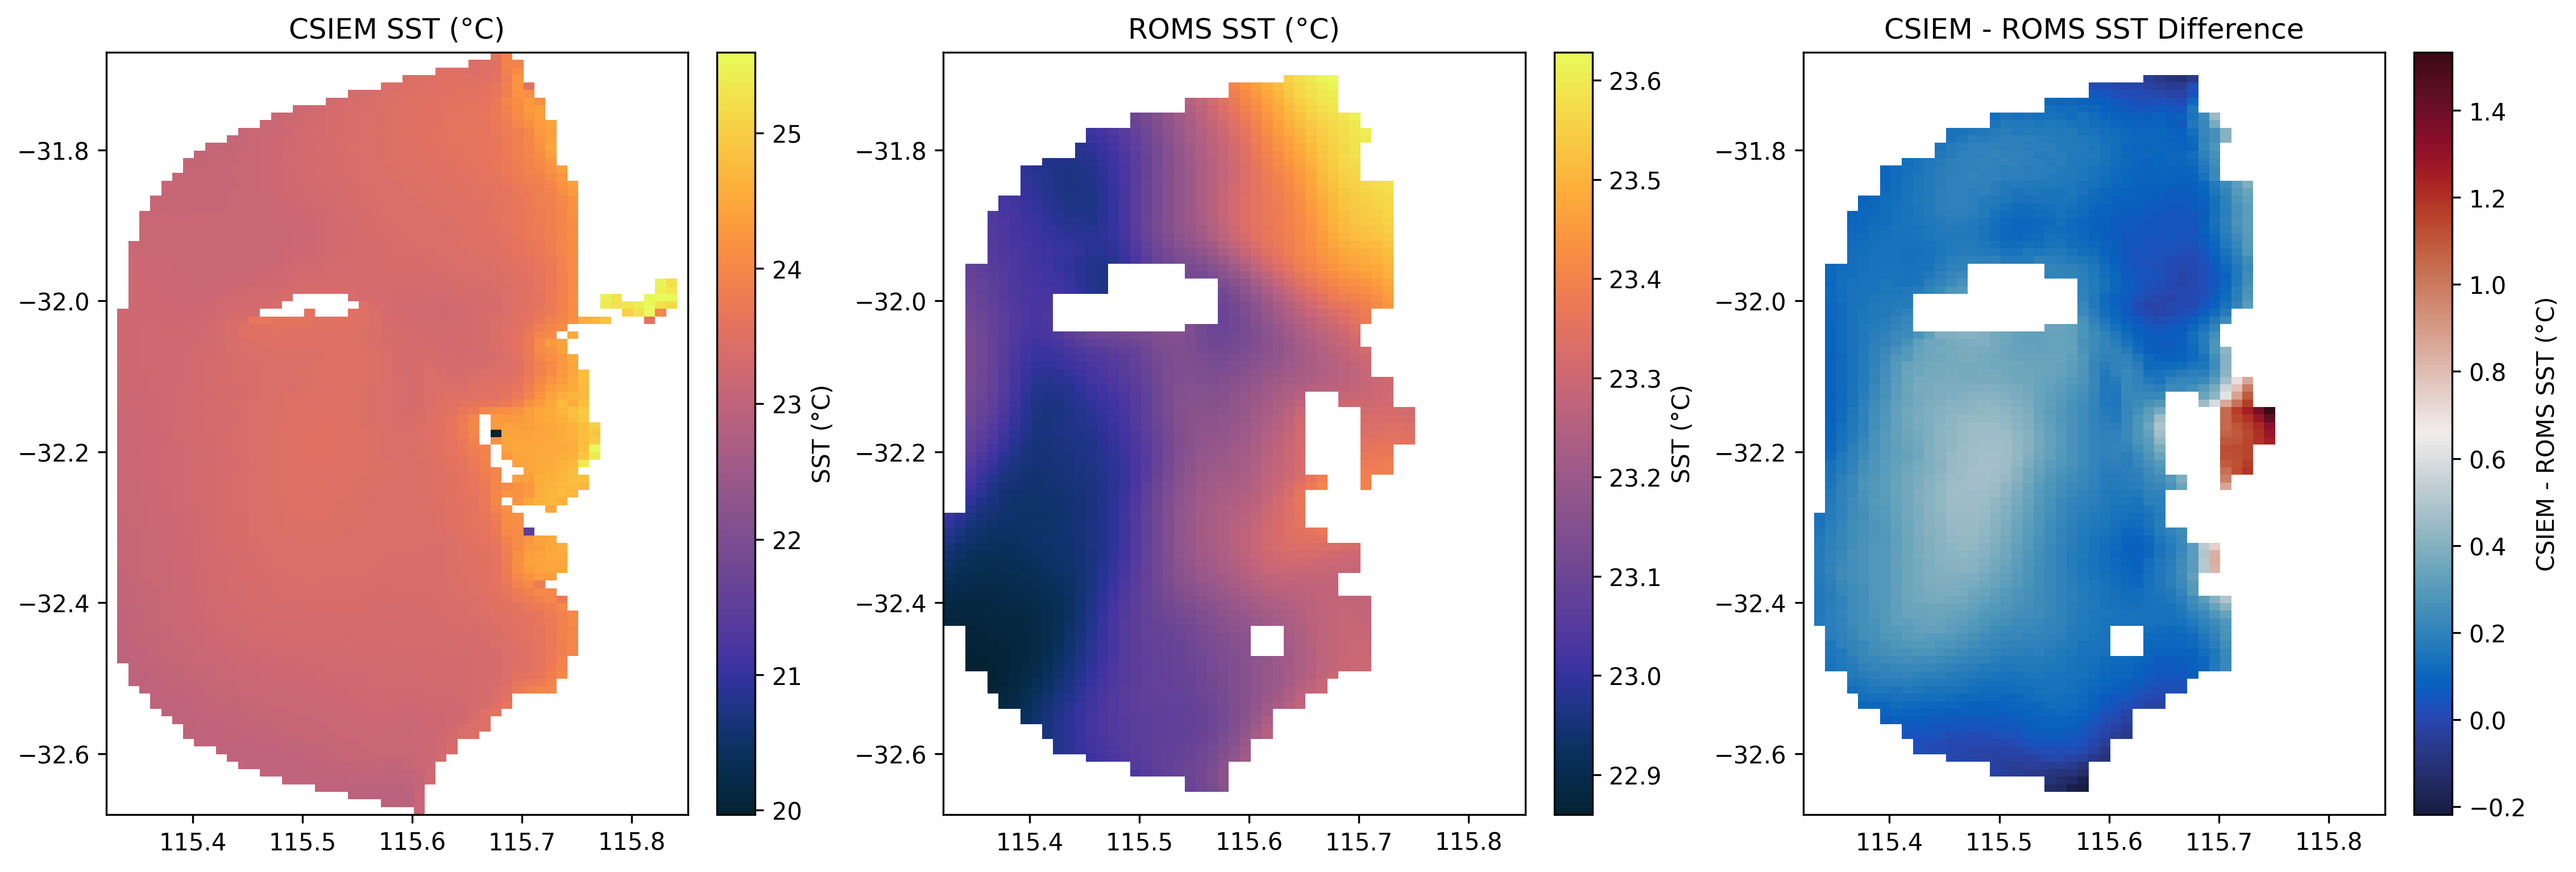

In [72]:
roms_avg_interp = roms_avg.interp(lat=csiem.latitude, lon=csiem.longitude)
sat_avg_interp = sat_avg.interp(latitude=csiem.latitude, longitude=csiem.longitude)
import cmocean
cmap = cmocean.cm.thermal  # For SST
diff_cmap = cmocean.cm.balance  # For SST differences
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300, constrained_layout=True)

# CSIEM Mean SST
im1 = axes[0].pcolormesh(csiem.longitude, csiem.latitude, csiem_avg['TEMP'], cmap=cmap, shading='auto')
fig.colorbar(im1, ax=axes[0], orientation="vertical", label="SST (°C)")
axes[0].set_title("CSIEM SST (°C)")

# ROMS Mean SST
im2 = axes[1].pcolormesh(csiem.longitude, csiem.latitude, roms_avg_interp['temp'], cmap=cmap, shading='auto')
fig.colorbar(im2, ax=axes[1], orientation="vertical", label="SST (°C)")
axes[1].set_title("ROMS SST (°C)")

# Difference Plot
im3 = axes[2].pcolormesh(csiem.longitude, csiem.latitude, csiem_avg['TEMP'] - roms_avg_interp['temp'], cmap=diff_cmap, shading='auto')
fig.colorbar(im3, ax=axes[2], orientation="vertical", label="CSIEM - ROMS SST (°C)")
axes[2].set_title("CSIEM - ROMS SST Difference")

plt.show()

In [3]:
#Now look at the CHL from CSIEM and chl from sentinel 3

csiem_chl=xr.open_dataset("/csiem/csiem_val/csiem_chl_march_daily.nc")
sen_chl=xr.open_dataset("/csiem/csiem_val/sentinel_march_Daily.nc")

In [4]:
# Compute monthly mean
csiem_chl_avg = csiem_chl.mean(dim="time")
sen_chl_avg = sen_chl.mean(dim="time")

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
# Define the color map
color_values = [
    [147,0,108], [111,0,144], [72,0,183], [33,0,222], [0,10,255], [0,74,255],
    [0,144,255], [0,213,255], [0,255,215], [0,255,119], [0,255,15], [96,255,0],
    [200,255,0], [255,235,0], [255,183,0], [255,131,0], [255,79,0], [255,31,0],
    [230,0,0], [165,0,0], [105,0,0]
]
sample_values = [0.0105927390978, 0.01511153517746066, 0.02218493234759939,
                 0.03259381777070279, 0.047886418593687446, 0.06831451603621097,
                 0.10029112852033921, 0.1473464383750438, 0.2164794954661175,
                 0.30882852380362497, 0.4533847704508146, 0.6661070836975002,
                 0.9786359751581525, 1.3961169989723918, 2.049610500045872,
                 3.011261431529367, 4.424106633340013, 6.311407543621453,
                 9.265646919990738, 13.612969492356, 20.0]
cmap = colors.ListedColormap(np.array(color_values)/255.0)
norm = colors.BoundaryNorm(sample_values, len(sample_values))

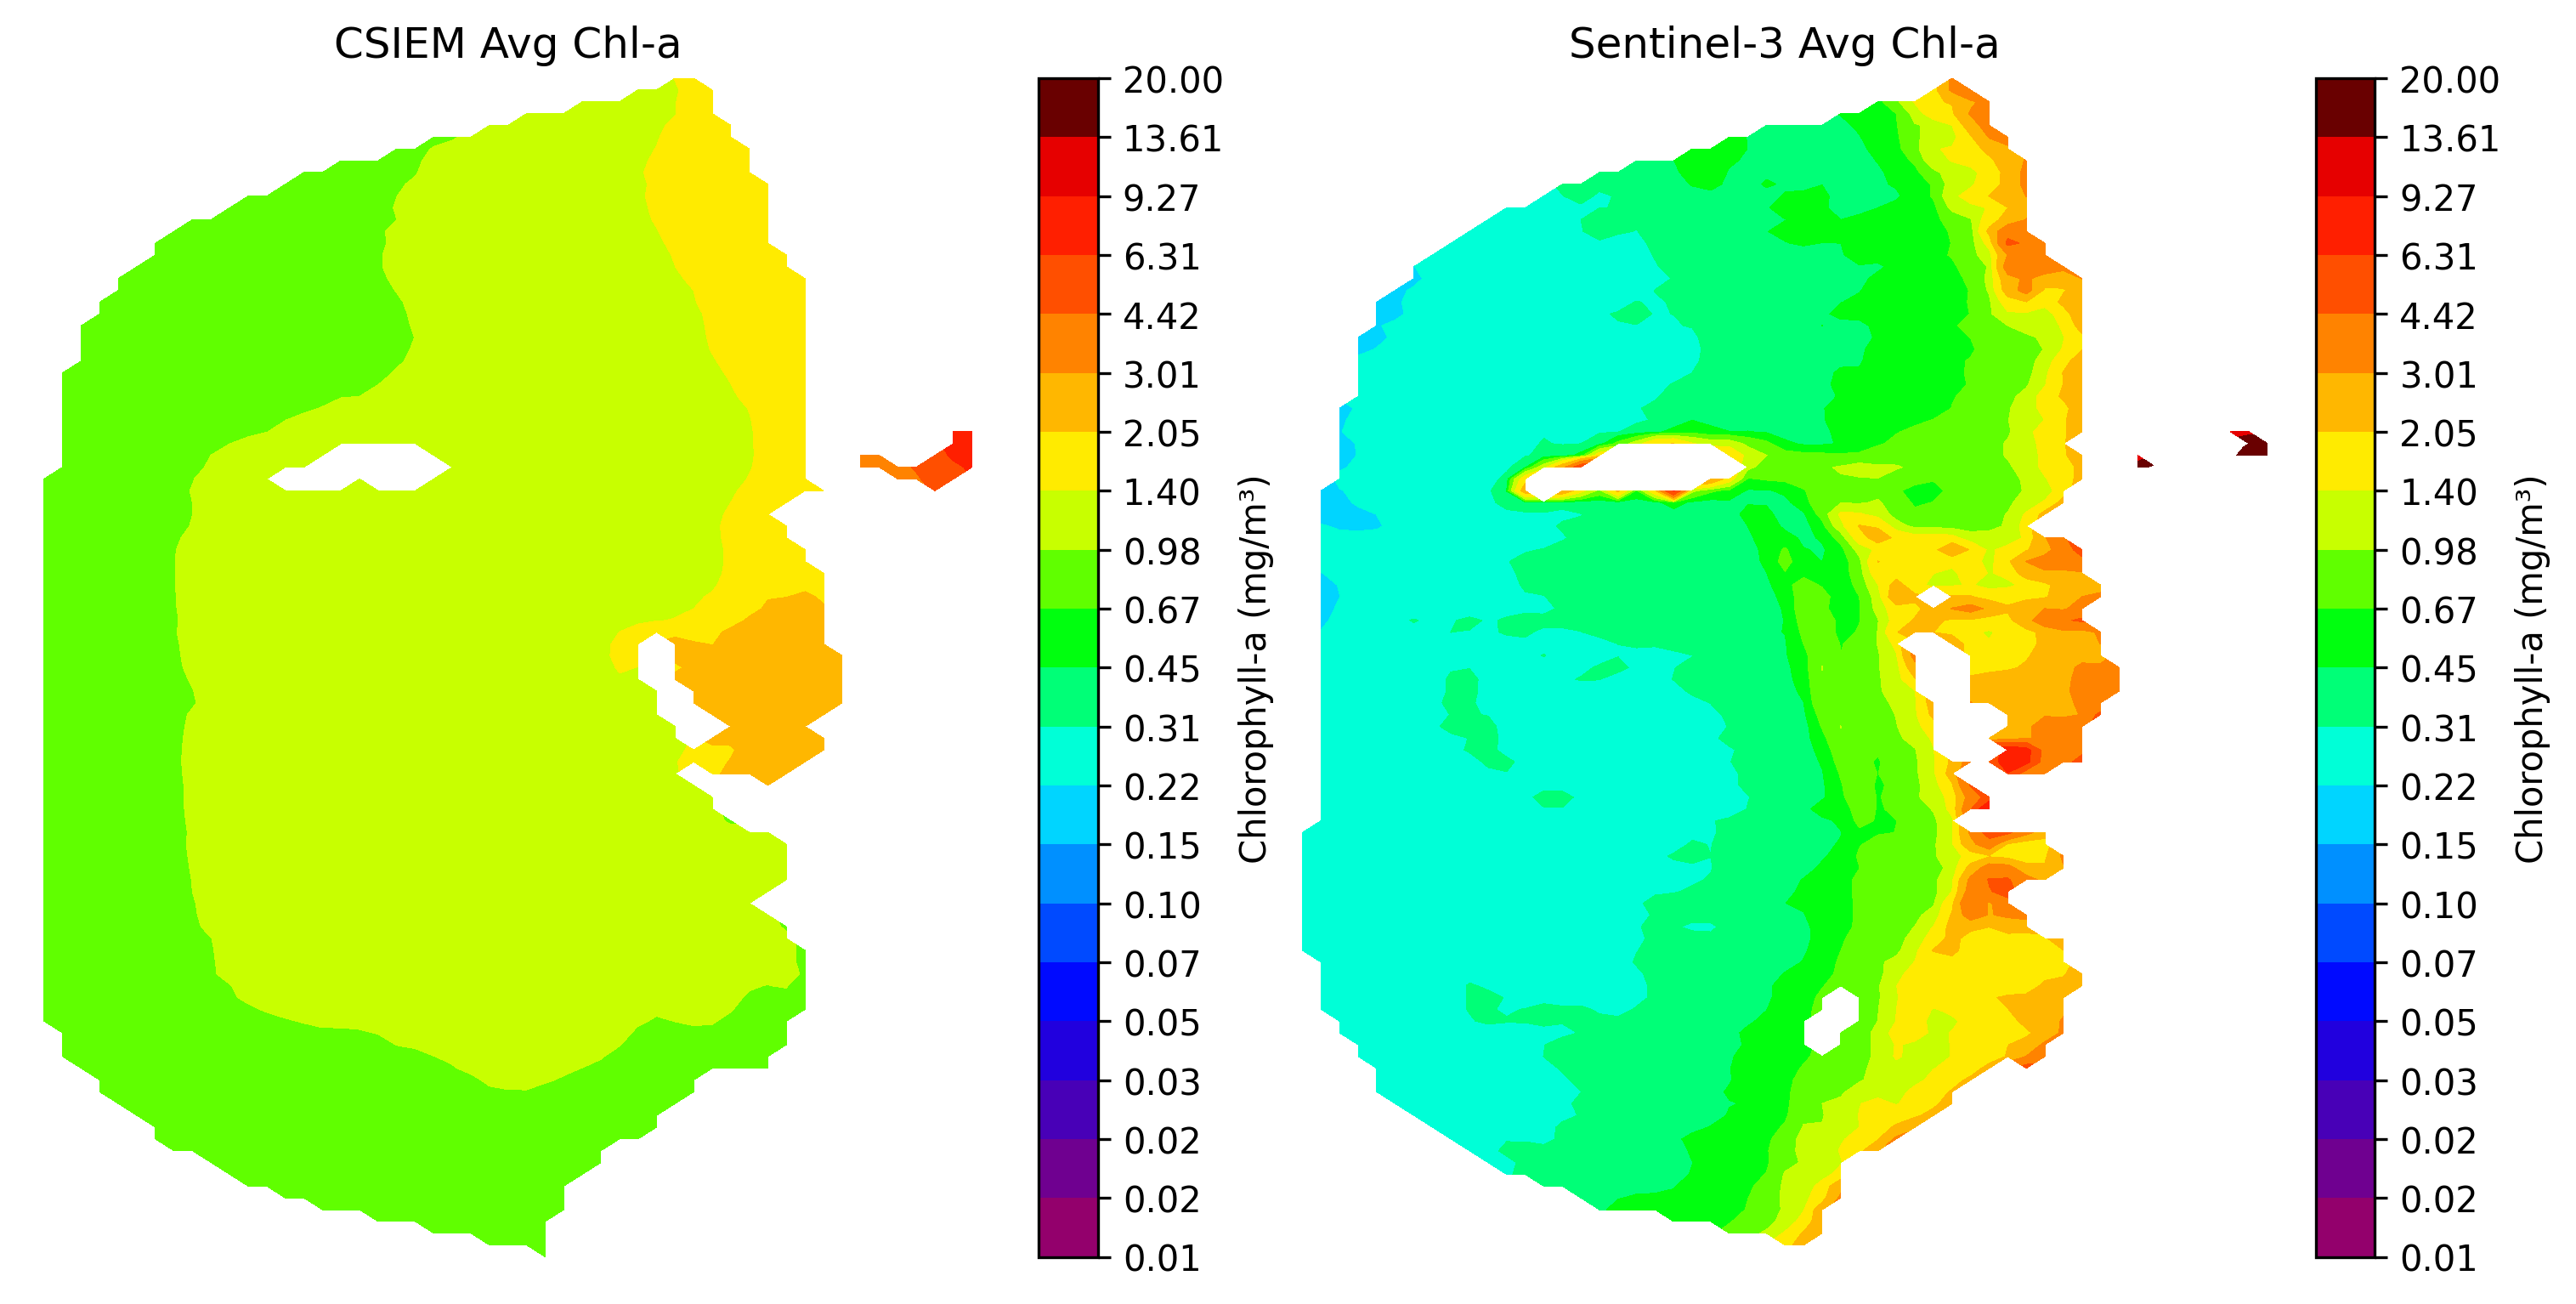

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300, constrained_layout=True)

# CSIEM Chlorophyll-a Contour Plot
cs1 = axes[0].contourf(
    csiem_chl.longitude, csiem_chl.latitude, csiem_chl_avg['CHL'],
    levels=sample_values, cmap=cmap, norm=norm
)
cbar1 =plt.colorbar(cs1, ax=axes[0], ticks=sample_values)
cbar1.set_label("Chlorophyll-a (mg/m³)")
axes[0].set_title("CSIEM Avg Chl-a")
axes[0].axis("off")  # Hide axis

# Sentinel-3 Chlorophyll-a Contour Plot
cs2 = axes[1].contourf(
    csiem_chl.longitude, csiem_chl.latitude, sen_chl_avg_interp["CHL"],
    levels=sample_values, cmap=cmap, norm=norm
)
cbar2 = plt.colorbar(cs2, ax=axes[1], ticks=sample_values)
cbar2.set_label("Chlorophyll-a (mg/m³)")
axes[1].set_title("Sentinel-3 Avg Chl-a")
axes[1].axis("off")  # Hide axis

plt.show()

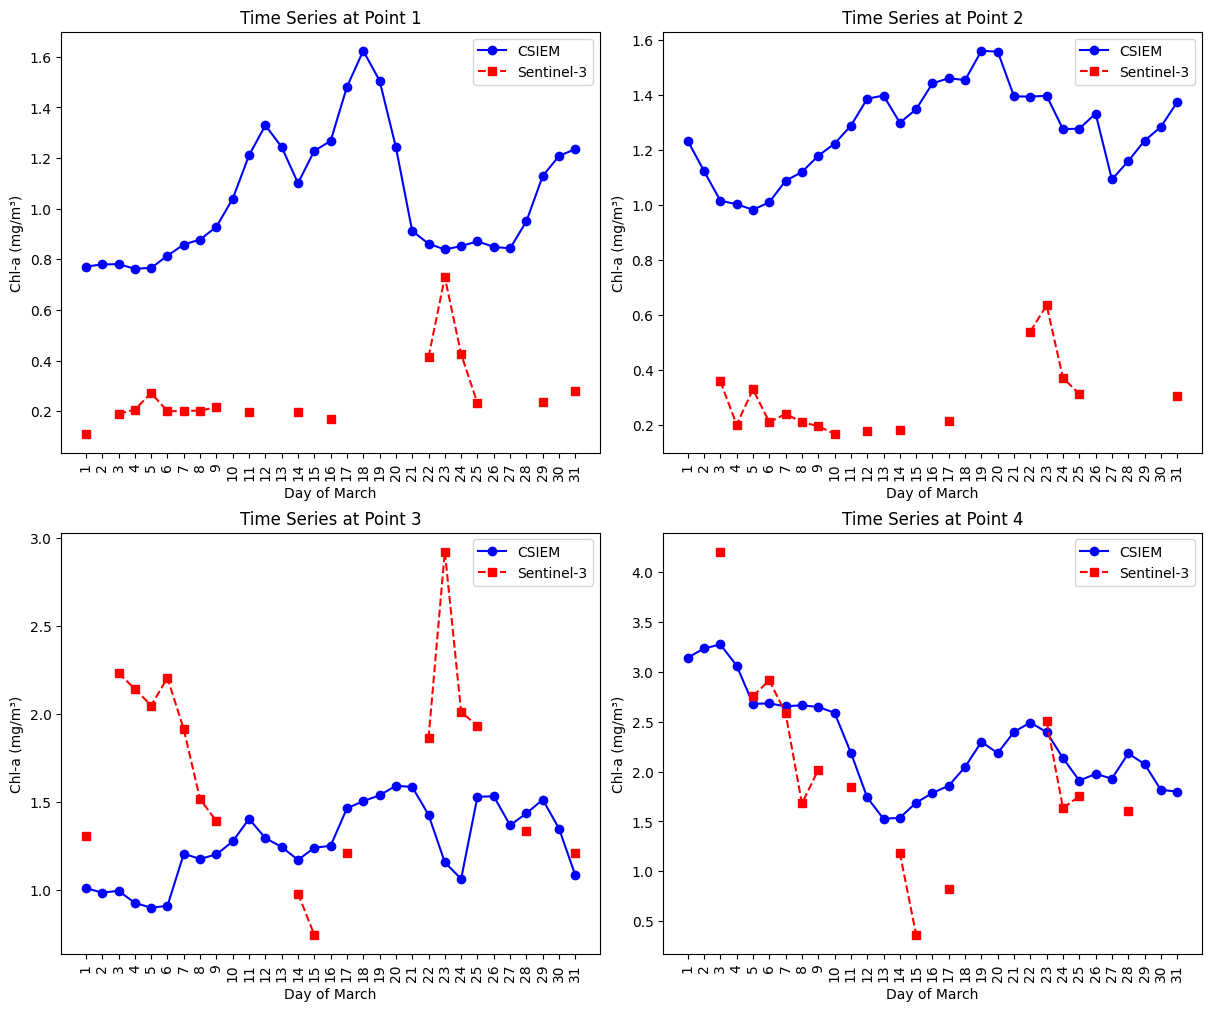

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define four points (longitude, latitude)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]

# Open Chl-a datasets for CSIEM and Sentinel-3
csiem_chl = xr.open_dataset("/csiem/csiem_val/csiem_chl_march_daily.nc")
sen_chl = xr.open_dataset("/csiem/csiem_val/sentinel_march_Daily.nc")

# Extract time series for each dataset using 'nearest' method
time_series = {}
for i, (lon, lat) in enumerate(points):
    # Use .sel() with 'nearest' to get the nearest point in the dataset
    csiem_chl_point = csiem_chl['CHL'].sel(longitude=lon, latitude=lat, method='nearest')
    sen_chl_point = sen_chl['CHL'].sel(longitude=lon, latitude=lat, method='nearest')

    time_series[f"Point {i+1}"] = {
        "CSIEM": csiem_chl_point,
        "Sentinel-3": sen_chl_point
    }

# Plot time series for four points
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

for i, (point, data) in enumerate(time_series.items()):
    ax = axes[i // 2, i % 2]
    
    # Convert time to day of the month
    days = pd.to_datetime(data["CSIEM"].time.values).day  

    ax.plot(days, data["CSIEM"], label="CSIEM", linestyle="-", color="blue", marker="o")
    ax.plot(days, data["Sentinel-3"], label="Sentinel-3", linestyle="--", color="red", marker="s")

    ax.set_title(f"Time Series at {point}")
    ax.set_xlabel("Day of March")
    ax.set_ylabel("Chl-a (mg/m³)")
    ax.set_xticks(range(1, 32))  # Set x-axis to show days from 1 to 31
    ax.set_xticklabels(range(1, 32), rotation=90)  # Rotate labels 90 degrees
    ax.legend()

plt.show()

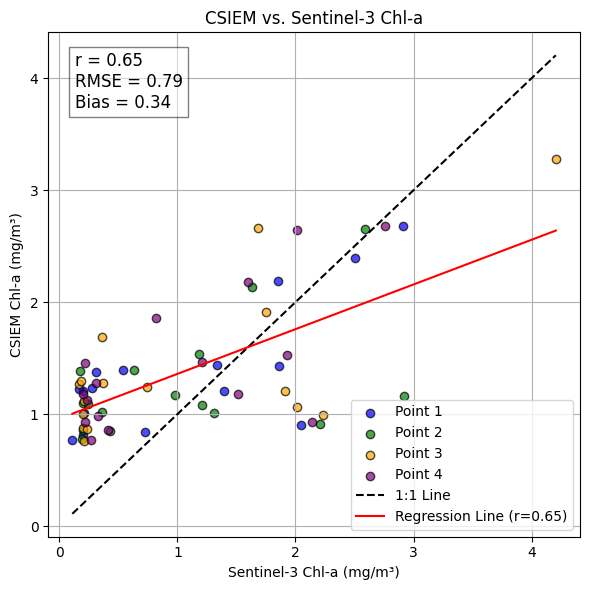

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

# Define four observation points (lon, lat)
points = [
    (115.441, -32.355),
    (115.521, -32.188),
    (115.686, -32.1),
    (115.72, -32.152)
]

# Extract Chl-a time series data at each point
csiem_chl_vals, sen_chl_vals = [], []
for lon, lat in points:
    csiem_chl_vals.append(csiem_chl['CHL'].sel(longitude=lon, latitude=lat, method='nearest').values)
    sen_chl_vals.append(sen_chl['CHL'].sel(longitude=lon, latitude=lat, method='nearest').values)

# Flatten the arrays for scatter plots
csiem_chl_vals = np.concatenate(csiem_chl_vals)
sen_chl_vals = np.concatenate(sen_chl_vals)

# Remove NaN values from both arrays
mask = ~np.isnan(csiem_chl_vals) & ~np.isnan(sen_chl_vals)
csiem_chl_vals = csiem_chl_vals[mask]
sen_chl_vals = sen_chl_vals[mask]

# Define function to compute statistics
def compute_stats(x, y):
    slope, intercept, r_value, _, _ = linregress(x, y)
    rmse = np.sqrt(mean_squared_error(x, y))
    mean_bias = np.mean(y - x)
    return slope, intercept, r_value, rmse, mean_bias

# Compute statistics for Sentinel-3 Chl-a vs CSIEM Chl-a
slope_sen, intercept_sen, r_sen, rmse_sen, bias_sen = compute_stats(sen_chl_vals, csiem_chl_vals)

# Define colors for points
colors = ["blue", "green", "orange", "purple"]
labels = ["Point 1", "Point 2", "Point 3", "Point 4"]

# Create side-by-side scatter plots
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True)

# Plot for Sentinel-3 vs CSIEM Chl-a
# ax = axes[0]
for j in range(4):
    ax.scatter(sen_chl_vals[j::4], csiem_chl_vals[j::4], label=labels[j], color=colors[j], edgecolors="black", alpha=0.7)

# 1:1 reference line
min_val, max_val = min(sen_chl_vals.min(), csiem_chl_vals.min()), max(sen_chl_vals.max(), csiem_chl_vals.max())
ax.plot([min_val, max_val], [min_val, max_val], "k--", label="1:1 Line")

# Regression line
reg_x = np.linspace(min_val, max_val, 100)
reg_y = slope_sen * reg_x + intercept_sen
ax.plot(reg_x, reg_y, "r-", label=f"Regression Line (r={r_sen:.2f})")

# Display stats
stats_text = f"r = {r_sen:.2f}\nRMSE = {rmse_sen:.2f}\nBias = {bias_sen:.2f}"
ax.text(0.05, 0.85, stats_text, transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

# Labels and title
ax.set_xlabel("Sentinel-3 Chl-a (mg/m³)")
ax.set_ylabel("CSIEM Chl-a (mg/m³)")
ax.set_title("CSIEM vs. Sentinel-3 Chl-a")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()